In [1]:
import numpy as np  
from sympy import exp
import sympy as sym
from sympy import lambdify
from numpy import amax
import matplotlib.pyplot as plt

In [2]:
matplotlib notebook

We are going to solve Poisson Equation with homogeneous Dirichlet boundary condition with using central difference 

Choose an integer for point number, please: 
1001


Choose numbers for the interval [a,b], in this order please:

a=
1


b=
2
The matrix created by central finite difference is:  
 
 [[ 1.  1.  0. ...,  0.  0.  0.]
 [ 0. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  0.]
 [ 0.  0.  0. ...,  0.  1.  1.]]


Maximum of the absolute value of the error is:  5.88844621507e-07

As it is expected, the error is O(h**2). 
 

Let's draw the graph of the errors with every point:  



<IPython.core.display.Javascript object>


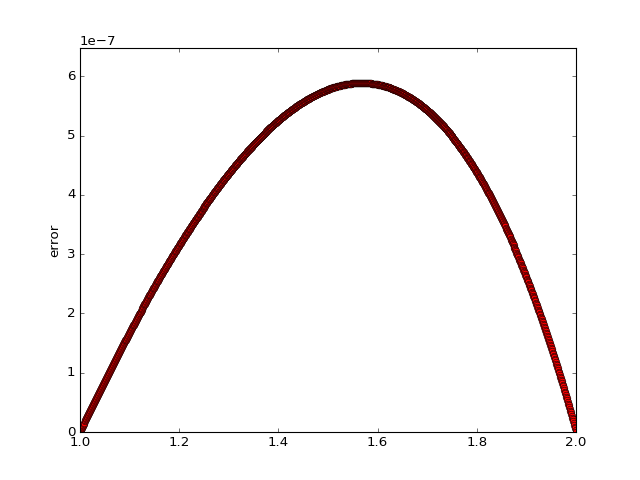

Note: We can notice that, the errors are increasing in the middle.  The estimation is getting worser, since we have information only at the boundary.


In [12]:
#This code is written by Orsan Kilicer. 10/16/2019
#For theory of this code, please check the pdf.

print("We are going to solve Poisson Equation with homogeneous \
Dirichlet boundary condition with using central difference","\n")

#Let's initialize our matrix(double array) A and vector(array) f. 
#Also, we want the interval from the user

print("Choose an integer for point number, please: ")
point_number=int(input())
print("\n")
print("Choose numbers for the interval [a,b], in this order please:""\n"),
print("a=")
a=float(input())
print("\n")
print("b=")
b=float(input())

#Let's initialize our finite difference matrix and f which will calculate 
#right hand side of the matrix-vector equation. 
#Also, we calculate the interval sizes between points.

A=np.zeros((point_number,point_number))
f=np.zeros(point_number)
interval_size=(b-a)/(point_number-1)

#Lets say point_number=1001(i.e. we are taking 1000 interval). 
#This means that length of every interval will be 1/1000=0.001
#Don't forget that u_0 and u_1000 will be zero because of the boundary condition. 
#We are substituting u_{-1} and u_{1001} instead of u_0 and u_{1000}. 
#So, u will remain as an 1000*1 vector.

#Lets fill in the matrix (This will not be efficient, because we can use special tools for sparse matrices.)
#In the future, I will use these kind of tools.

#How to obtain this matrix is not so hard. You can check from the pdf.

for i in range(0,point_number):
    if i==0:
        A[i,i]=1
        A[i,i+1]=1
        A[i+1,i+1]=-2
        A[i+1,i+2]=1
        A[point_number-1,point_number-1]=1
        A[point_number-1,point_number-2]=1
        A[point_number-2,point_number-3]=1
        A[point_number-2,point_number-2]=-2
        
    elif i>1 and i<point_number-2:
            A[i,i-1]=1
            A[i,i]=-2
            A[i,i+1]=1
    
print('The matrix created by central finite difference is: ','\n',"\n",A)
print('\n')

#Now, we will define the points we are going to use. 
#As you can notice, I initialized the array and the first point is a.
#I am adding the interval size to obtain second point, and so forth.

point_vector=np.zeros(point_number)
point_vector[0]=a;
for i in range(0,point_number-1):
    point_vector[i+1]=point_vector[i]+interval_size

#Now, we are choosing test function. 
#We are choosing, because we want to see whether oud code is working or not.
x=sym.Symbol('x')    
expr1=(x-a)*(b-x)*exp(x)
real_solution_function=lambdify(x,expr1,"numpy")
real_solution=real_solution_function(point_vector)    
   
#With our test function, we can find f which is :
expr2=-(-x**2+(b+a-4)*x+(2-a)*b+2*a-2)*exp(x)

#Now, we will solve the matrix-vector equation which is Au=f. 
#(note: internal_size**2 comes from the matrix)
f = lambdify(x, expr2, "numpy")
right_hand_side=-interval_size**2*f(point_vector)
solution=np.linalg.solve(A,right_hand_side)

#Upper side, we found solution. However, it is not the solution we want, 
#because it contains u_{-1} and u_{1001}. Instead of them, we are putting u_0 and u_{1000}. 
#They are boundary points, so the values will be 0.
solution[0]=0
solution[point_number-1]=0

#Now we are calculating absolute max error. 
#Note that second derivative with central finite difference is O(h**2)
error=abs(real_solution-solution)
maxerror=np.amax(error)
print("Maximum of the absolute value of the error is: ",maxerror)
print('\n''As it is expected, the error is O(h**2).',"\n","\n")

#We are drawing the error with respect to points.
print("Let's draw the graph of the errors with every point: ","\n")
plt.plot(point_vector, error, 'ro')
plt.ylabel('error')
plt.ylim((0,1.1*maxerror)) # you can choose different number here, it is your choice.
plt.xlim(a,b)
plt.show()

print("Note: We can notice that, the errors are increasing in the middle. \
 The estimation is getting worser, since we have information only at the boundary.") 


#Generally we don't find to find the inverse of a matrix. It is costly. 
#However, in this case, Jacobi and/or Gauss-Seidel may diverge, 
#since the matrix we obtained is not strictly diagonally dominant.
#It will be costly to see that whether these methods converge or not. 
#There are modern itertive solvers. We will come to them later.
